In [ ]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# First get path to where simulation data is being stored in my Goodle drive
path = '/content/drive/MyDrive/Colab Notebooks/collective_motion/spring_03_density_2/';
# These are from the agents.dat files
# Then choose the file I want to load
# check that this is from the last timestep???
filename1 = 'new.dat' ;
# filename2 = '1.0_1_2.dat'
# filename3 = '0.8_3_6.dat'
# Read file into dataframe
df1 = pd.read_csv(path + filename1, sep="\s+",header = None,usecols=[0,1])
# df2 = pd.read_csv(path + filename2, sep="\s+",header = None,usecols=[0,1])
# df3 = pd.read_csv(path + filename3, sep="\s+",header = None,usecols=[0,1])
# The first two columns of the data frame are the x and y values of each point
points1 = df1[[0,1]].to_numpy()
# points2 = df2[[0,1]].to_numpy()
# points3 = df3[[0,1]].to_numpy()

NameError: name 'path' is not defined

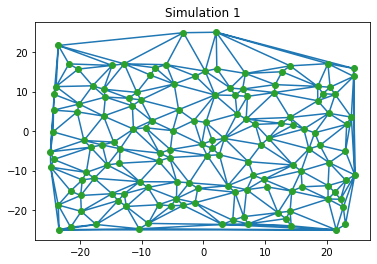

In [ ]:
# Now I will make the Delaunay Triangulation
from scipy.spatial import Delaunay
tri1 = Delaunay(points1)
# tri2 = Delaunay(points2)
# tri3 = Delaunay(points3)

#And plot it
import matplotlib.pyplot as plt
plt.triplot(points1[:,0], points1[:,1], tri1.simplices)
plt.plot(points1[:,0], points1[:,1], 'o')
plt.title('Simulation 1')
plt.show()

# plt.triplot(points2[:,0], points2[:,1], tri2.simplices)
# plt.plot(points2[:,0], points2[:,1], 'o')
# plt.title('Simulation 1')
# plt.show()


# plt.triplot(points3[:,0], points3[:,1], tri3.simplices)
# plt.plot(points3[:,0], points3[:,1], 'o')
# plt.title('Simulation 3')
# plt.show()

In [ ]:
# First get path to where simulation data is being stored in my Goodle drive
path = '/content/drive/MyDrive/Colab Notebooks/Experiments/';
# Then choose the file I want to load
filename1 = '1.1_20x_triCulture_SMCs_droplet_D14.txt';
filename2 = '1.1_20x_delayed_CoCulture_NHLFs_droplet_D19_Point_Cloud.txt';
filename3 = '1.1_20x_direct_CoCulture_SMCs_droplet.txt';
# filename4 = '1.1_20x_triCulture_SMCs_wall_D14.txt';
# filename5 = '1.2_20x_triCulture_SMCs_droplet_D19_point_cloud.txt';
# Read file into dataframe
nf1 = np.loadtxt(path + filename1, skiprows=1,usecols=(2,3))
nf1[:,1] *= -1;
df1 = pd.DataFrame(nf1, columns = ['X','Y'])
nf2 = np.loadtxt(path + filename2, skiprows=1,usecols=(2,3))
nf2[:,1] *= -1;
df2 = pd.DataFrame(nf2, columns = ['X','Y'])
nf3 = np.loadtxt(path + filename3, skiprows=1,usecols=(2,3))
nf3[:,1] *= -1;
df3 = pd.DataFrame(nf3, columns = ['X','Y'])
# nf4 = np.loadtxt(path + filename4, skiprows=1,usecols=(1,2))
# df4 = pd.DataFrame(nf4, columns = ['X','Y'])
# nf5 = np.loadtxt(path + filename5, skiprows=1,usecols=(1,2))
# df5 = pd.DataFrame(nf5, columns = ['X','Y'])
# The first two columns of the data frame are the x and y values of each point
points1 = df1.to_numpy()
points2 = df2.to_numpy()
points3 = df3.to_numpy()
# points4 = df4.to_numpy()
# points5 = df5.to_numpy()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


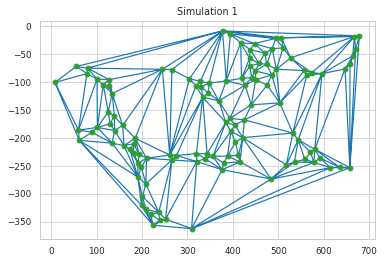

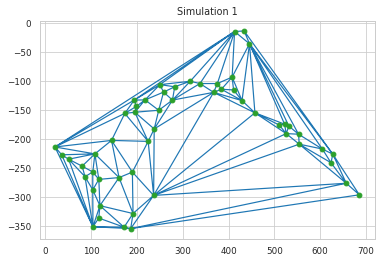

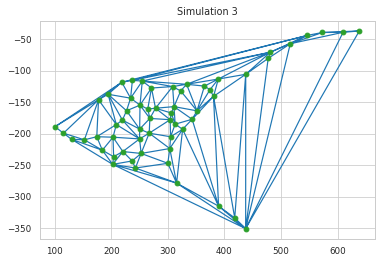

In [ ]:
# Now I will make the Delaunay Triangulation
from scipy.spatial import Delaunay
tri1 = Delaunay(points1)
tri2 = Delaunay(points2)
tri3 = Delaunay(points3)

#And plot it
import matplotlib.pyplot as plt
plt.triplot(points1[:,0], points1[:,1], tri1.simplices)
plt.plot(points1[:,0], points1[:,1], 'o')
plt.title('Simulation 1')
plt.show()

plt.triplot(points2[:,0], points2[:,1], tri2.simplices)
plt.plot(points2[:,0], points2[:,1], 'o')
plt.title('Simulation 1')
plt.show()


plt.triplot(points3[:,0], points3[:,1], tri3.simplices)
plt.plot(points3[:,0], points3[:,1], 'o')
plt.title('Simulation 3')
plt.show()

In [ ]:
#Now I will use this triangulation to define nodes and edges of a graph
from collections import defaultdict
from itertools import permutations
#finding all the neighbors of each vertex
_neighbors1 = defaultdict(set)
for simplex in tri1.vertices:
    for i, j in permutations(simplex, 2):
        _neighbors1[i].add(j)
#list those neighbors via their index
points1 = [tuple(p) for p in tri1.points]
neighbors1 = {}
for k, v in _neighbors1.items():
    neighbors1[k] = [i for i in v]

# _neighbors2 = defaultdict(set)
# for simplex in tri2.vertices:
#     for i, j in permutations(simplex, 2):
#         _neighbors2[i].add(j)

# points2 = [tuple(p) for p in tri2.points]
# neighbors2 = {}
# for k, v in _neighbors2.items():
#     neighbors2[k] = [i for i in v]

# _neighbors3 = defaultdict(set)
# for simplex in tri3.vertices:
#     for i, j in permutations(simplex, 2):
#         _neighbors3[i].add(j)

# points3 = [tuple(p) for p in tri3.points]
# neighbors3 = {}
# for k, v in _neighbors3.items():
#     neighbors3[k] = [i for i in v]

In [ ]:
# Now I will make the graph
# First I add all the points to the graph
G1 = nx.Graph()
for i in range(len(points1)):
  G1.add_node(i)
print('G1 num nodes: ' + str(G1.number_of_nodes()))

# # Now I will make the graph
# # First I add all the points to the graph
# G2 = nx.Graph()
# for i in range(len(points2)):
#   G2.add_node(i)
# print('G2 num nodes: ' + str(G2.number_of_nodes()))

# # Now I will make the graph
# # First I add all the points to the graph
# G3 = nx.Graph()
# for i in range(len(points3)):
#   G3.add_node(i)
# print('G3 num nodes: ' + str(G3.number_of_nodes()))

G1 num nodes: 144


Text(0.5, 1.0, 'Graph 1')

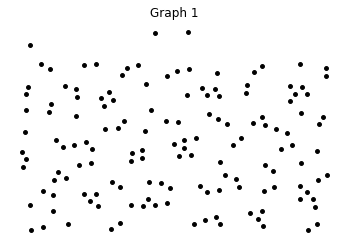

In [ ]:
# Verify what the graph nodes look like
pos1 = {}
for k in neighbors1:
    v = points1[k]
    pos1[k] = [i for i in v]
fig1, ax1 = plt.subplots()
nx.draw(G1, pos=pos1, node_color='k',node_size=15, ax=ax1)
plt.title('Graph 1')
# Verify what the graph nodes look like
# pos2 = {}
# for k in neighbors2:
#     v = points2[k]
#     pos2[k] = [i for i in v]
# fig2, ax2 = plt.subplots()
# nx.draw(G2, pos=pos2, node_color='k',node_size=15, ax=ax2)
# plt.title('Graph 2')
# # Verify what the graph nodes look like
# pos3 = {}
# for k in neighbors3:
#     v = points3[k]
#     pos3[k] = [i for i in v]
# fig3, ax3 = plt.subplots()
# nx.draw(G3, pos=pos3, node_color='k',node_size=15, ax=ax3)
# plt.title('Graph 3')

In [ ]:
# Now I will only keep edges within a certain distance
from scipy.spatial import distance
G1.remove_edges_from(G1.edges())
for k in neighbors1:
    node1 = k
    for j in neighbors1[k]:
      node2 = j
      if distance.euclidean(points1[node1],points1[node2]) < 4:
        G1.add_edge(node1,node2)
print('G1 num edges: ' + str(G1.number_of_edges()))

# # Now I will only keep edges within a certain distance
# from scipy.spatial import distance
# G2.remove_edges_from(G2.edges())
# for k in neighbors2:
#     node1 = k
#     for j in neighbors2[k]:
#       node2 = j
#       if distance.euclidean(points2[node1],points2[node2]) < 3:
#         G2.add_edge(node1,node2)
# print('G2 num edges: '+ str(G2.number_of_edges()))

# # Now I will only keep edges within a certain distance
# from scipy.spatial import distance
# G3.remove_edges_from(G3.edges())
# for k in neighbors3:
#     node1 = k
#     for j in neighbors3[k]:
#       node2 = j
#       if distance.euclidean(points3[node1],points3[node2]) < 3:
#         G3.add_edge(node1,node2)
# print('G3 num edges: '+ str(G3.number_of_edges()))

G1 num edges: 143


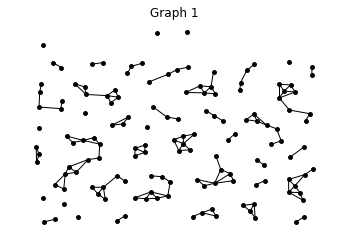

In [ ]:
# plot the new result
fig1, ax1 = plt.subplots()
nx.draw(G1, pos=pos1, node_color='k', node_size = 15, ax=ax1)
plt.title('Graph 1')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Figs/exp1.png',dpi = 800)
# plot the new result
# fig2, ax2 = plt.subplots()
# nx.draw(G2, pos=pos2, node_color='k', node_size = 15, ax=ax2)
# plt.title('Graph 2')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/Figs/exp2.png',dpi = 800)
# # plot the new result
# fig3, ax3 = plt.subplots()
# nx.draw(G3, pos=pos3, node_color='k', node_size = 15, ax=ax3)
# plt.title('Graph 3')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/Figs/exp3.png',dpi = 800)

In [ ]:
# Now we can do some graph metrics
my_dict1 = nx.average_neighbor_degree(G1)
my_dict2 = nx.average_neighbor_degree(G2)
my_dict3 = nx.average_neighbor_degree(G3)
print(np.array(list(my_dict1.values())).mean())
print(np.array(list(my_dict2.values())).mean())
print(np.array(list(my_dict3.values())).mean())

2.5753472222222222
1.6875
3.8041666666666663


In [ ]:
df1 = pd.DataFrame.from_dict(my_dict1,orient='index',columns = ['Sim1'])
df2 = pd.DataFrame.from_dict(my_dict2,orient='index',columns = ['Sim2'])
df3 = pd.DataFrame.from_dict(my_dict3,orient='index',columns = ['Sim3'])
frames = [df1, df2, df3]
df_all = pd.concat(frames)

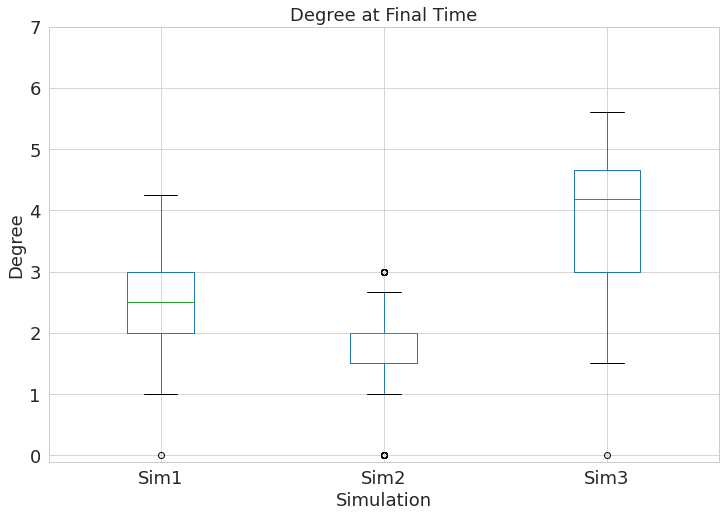

In [ ]:
#seaborn setting
sns.set_style("whitegrid",rc = {"grid.linewidth": 0.1,'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial']})
sns.set_context("paper", font_scale=1) 
plt.figure(figsize=(12,8))
flierprops = dict(marker = 'o', markersize=1,linestyle='none')
boxplot = df_all.boxplot(column = ['Sim1','Sim2','Sim3'])
plt.xticks(fontsize = 18)
boxplot.set(ylim=(-.1,7))
boxplot.set_ylabel('Degree',fontsize = 18)
boxplot.set_xlabel('Simulation',fontsize = 18)
plt.yticks(fontsize = 18)
boxplot.set_title("Degree at Final Time",fontsize = 18)
plt.show()

### The **density** is computed to be: $\frac{2m}{n(n-1)}$ where $n$ is the number of nodes and $m$ is the number of edges.  The density is $0$ for a graph without edges and $1$ for a complete graph. The density can be higher than 1 if there are loops.

In [ ]:
# Now we can do some graph metrics
my_dict1 = nx.density(G1)
print('G1 has density: ' + str(my_dict1))
my_dict2 = nx.density(G2)
print('G2 has density: ' + str(my_dict2))
my_dict3 = nx.density(G3)
print('G3 has density: ' + str(my_dict3))

G1 has density: 0.017094017094017096
G2 has density: 0.010586635586635586
G3 has density: 0.02505827505827506


https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.approximation.clustering_coefficient.average_clustering.html#networkx.algorithms.approximation.clustering_coefficient.average_clustering

In [ ]:
# Clustering
my_dict1 = nx.average_clustering(G1)
print('G1 has Clustering Coeff: ' + str(my_dict1))
my_dict2 = nx.average_clustering(G2)
print('G2 has Clustering Coeff: ' + str(my_dict2))
my_dict3 = nx.average_clustering(G3)
print('G3 has Clustering Coeff: ' + str(my_dict3))

G1 has Clustering Coeff: 0.473466505246166
G2 has Clustering Coeff: 0.5061728395061728
G3 has Clustering Coeff: 0.4830508474576269


Matching Index: https://www.frontiersin.org/articles/10.3389/fbioe.2020.00034/full
Need to code this one.

## The **degree centrality** for a node v is the fraction of nodes it is connected to.

0.017094017094017096
0.010586635586635588
0.025058275058275056


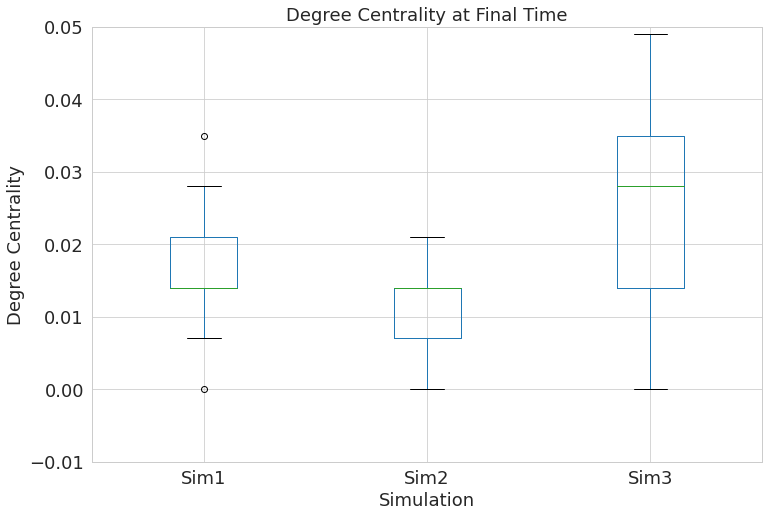

In [ ]:
# Now we can do some graph metrics
my_dict1 = nx.degree_centrality(G1)
my_dict2 = nx.degree_centrality(G2)
my_dict3 = nx.degree_centrality(G3)
print(np.array(list(my_dict1.values())).mean())
print(np.array(list(my_dict2.values())).mean())
print(np.array(list(my_dict3.values())).mean())

df1 = pd.DataFrame.from_dict(my_dict1,orient='index',columns = ['Sim1'])
df2 = pd.DataFrame.from_dict(my_dict2,orient='index',columns = ['Sim2'])
df3 = pd.DataFrame.from_dict(my_dict3,orient='index',columns = ['Sim3'])
frames = [df1, df2, df3]
df_all = pd.concat(frames)

#seaborn setting
sns.set_style("whitegrid",rc = {"grid.linewidth": 0.1,'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial']})
sns.set_context("paper", font_scale=1) 
plt.figure(figsize=(12,8))
flierprops = dict(marker = 'o', markersize=1,linestyle='none')
boxplot = df_all.boxplot(column = ['Sim1','Sim2','Sim3'])
plt.xticks(fontsize = 18)
boxplot.set(ylim=(-.01,.05))
boxplot.set_ylabel('Degree Centrality',fontsize = 18)
boxplot.set_xlabel('Simulation',fontsize = 18)
plt.yticks(fontsize = 18)
boxplot.set_title("Degree Centrality at Final Time",fontsize = 18)
plt.show()

## The **closeness centrality** for a node v is a measure to detect important nodes which can communicate quickly with other nodes in a network.


https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.closeness_centrality.html#networkx.algorithms.centrality.closeness_centrality


0.0627902534712199
0.014544888257604527
0.08507133130927068


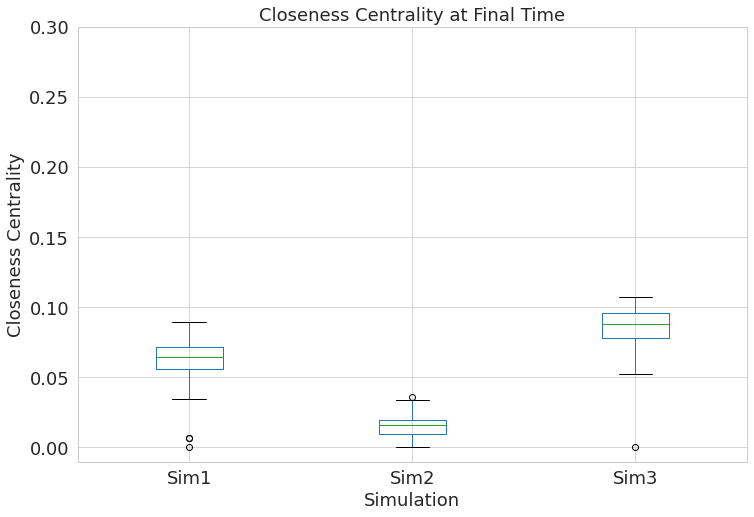

In [ ]:
# Now we can do some graph metrics
my_dict1 = nx.closeness_centrality(G1)
my_dict2 = nx.closeness_centrality(G2)
my_dict3 = nx.closeness_centrality(G3)
print(np.array(list(my_dict1.values())).mean())
print(np.array(list(my_dict2.values())).mean())
print(np.array(list(my_dict3.values())).mean())

df1 = pd.DataFrame.from_dict(my_dict1,orient='index',columns = ['Sim1'])
df2 = pd.DataFrame.from_dict(my_dict2,orient='index',columns = ['Sim2'])
df3 = pd.DataFrame.from_dict(my_dict3,orient='index',columns = ['Sim3'])
frames = [df1, df2, df3]
df_all = pd.concat(frames)

#seaborn setting
sns.set_style("whitegrid",rc = {"grid.linewidth": 0.1,'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial']})
sns.set_context("paper", font_scale=1) 
plt.figure(figsize=(12,8))
flierprops = dict(marker = 'o', markersize=1,linestyle='none')
boxplot = df_all.boxplot(column = ['Sim1','Sim2','Sim3'])
plt.xticks(fontsize = 18)
boxplot.set(ylim=(-.01,.3))
boxplot.set_ylabel('Closeness Centrality',fontsize = 18)
boxplot.set_xlabel('Simulation',fontsize = 18)
plt.yticks(fontsize = 18)
boxplot.set_title("Closeness Centrality at Final Time",fontsize = 18)
plt.show()

### The **betweenness centrality** for a node v shows the nodes which form such bridges so that two communities can communicate with each other. 

**Betweenness centrality (BC) ** measures the frequency of a particular node (cell) being traversed if the shortest paths between all pairs of cells are traveled (Brandes, 2001). In tangible terms, BC models the direct transport of information given prior knowledge of the fastest route to the destination.

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html#networkx.algorithms.centrality.betweenness_centrality

0.10090066428094596
0.0003878164089431695
0.07607289033345371


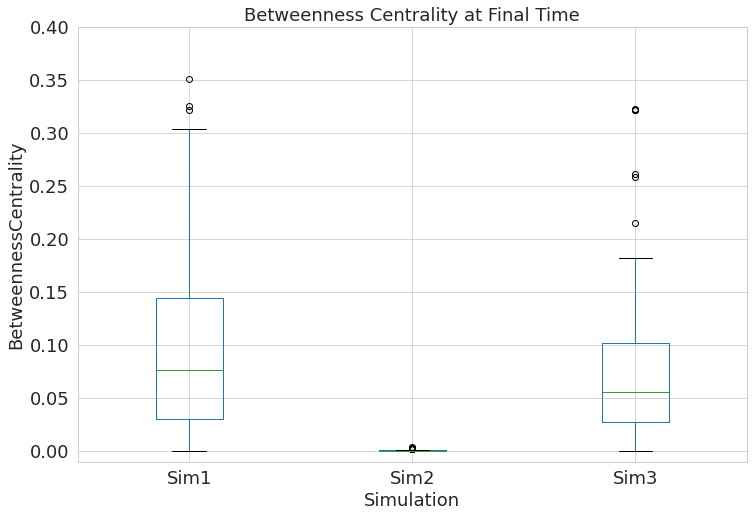

In [ ]:
# Now we can do some graph metrics
my_dict1 = nx.betweenness_centrality(G1)
my_dict2 = nx.betweenness_centrality(G2)
my_dict3 = nx.betweenness_centrality(G3)
print(np.array(list(my_dict1.values())).mean())
print(np.array(list(my_dict2.values())).mean())
print(np.array(list(my_dict3.values())).mean())

df1 = pd.DataFrame.from_dict(my_dict1,orient='index',columns = ['Sim1'])
df2 = pd.DataFrame.from_dict(my_dict2,orient='index',columns = ['Sim2'])
df3 = pd.DataFrame.from_dict(my_dict3,orient='index',columns = ['Sim3'])
frames = [df1, df2, df3]
df_all = pd.concat(frames)

#seaborn setting
sns.set_style("whitegrid",rc = {"grid.linewidth": 0.1,'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial']})
sns.set_context("paper", font_scale=1) 
plt.figure(figsize=(12,8))
flierprops = dict(marker = 'o', markersize=1,linestyle='none')
boxplot = df_all.boxplot(column = ['Sim1','Sim2','Sim3'])
plt.xticks(fontsize = 18)
boxplot.set(ylim=(-.01,.4))
boxplot.set_ylabel('BetweennessCentrality',fontsize = 18)
boxplot.set_xlabel('Simulation',fontsize = 18)
plt.yticks(fontsize = 18)
boxplot.set_title("Betweenness Centrality at Final Time",fontsize = 18)
plt.show()

### **Random-walk centrality** measures the frequency nodes are traversed by using random walkers between all pairs of cells. These random paths taken may not necessarily be the shortest and are stochastically determined by the paths followed by the random walkers. In contrast to BC, RWC reflects the potential diffusion of a signal through cells in a tissue, given that the signal has defined source and destination nodes.

First we will calculate the number of connected components of each Graph.

In [ ]:
S1 = [G1.subgraph(c).copy() for c in nx.connected_components(G1)]
S2 = [G2.subgraph(c).copy() for c in nx.connected_components(G2)]
S3 = [G3.subgraph(c).copy() for c in nx.connected_components(G3)]

print('G1 has: ' +  str(len(S1)) + ' connected components')
print('G2 has: ' +  str(len(S2)) + ' connected components')
print('G3 has: ' +  str(len(S3)) + ' connected components')


G1 has: 3 connected components
G2 has: 42 connected components
G3 has: 2 connected components


0.1524832022826061
0.33333333333333354
0.11688540965721815


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


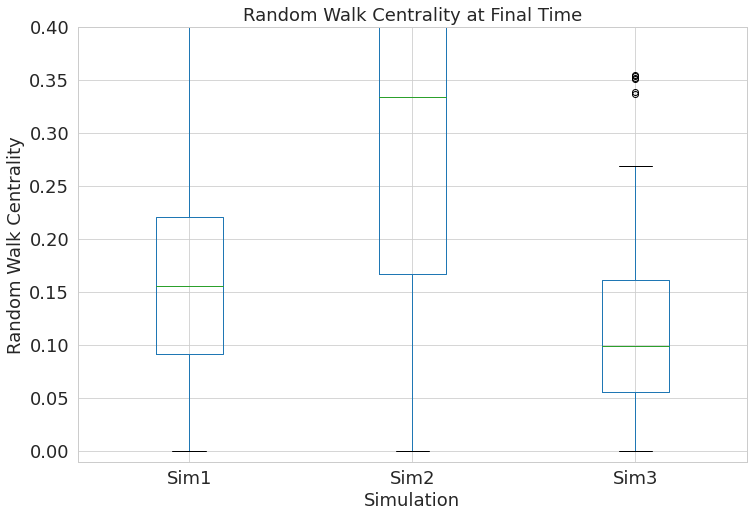

In [ ]:
# Now we can do some graph metrics
my_dict1 = nx.current_flow_betweenness_centrality(S1[0])
my_dict2 = nx.current_flow_betweenness_centrality(S2[5])
my_dict3 = nx.current_flow_betweenness_centrality(S3[0])
print(np.array(list(my_dict1.values())).mean())
print(np.array(list(my_dict2.values())).mean())
print(np.array(list(my_dict3.values())).mean())

df1 = pd.DataFrame.from_dict(my_dict1,orient='index',columns = ['Sim1'])
df2 = pd.DataFrame.from_dict(my_dict2,orient='index',columns = ['Sim2'])
df3 = pd.DataFrame.from_dict(my_dict3,orient='index',columns = ['Sim3'])
frames = [df1, df2,df3]
df_all = pd.concat(frames)

#seaborn setting
sns.set_style("whitegrid",rc = {"grid.linewidth": 0.1,'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial']})
sns.set_context("paper", font_scale=1) 
plt.figure(figsize=(12,8))
flierprops = dict(marker = 'o', markersize=1,linestyle='none')
boxplot = df_all.boxplot(column = ['Sim1','Sim2','Sim3'])
plt.xticks(fontsize = 18)
boxplot.set(ylim=(-.01,.4))
boxplot.set_ylabel('Random Walk Centrality',fontsize = 18)
boxplot.set_xlabel('Simulation',fontsize = 18)
plt.yticks(fontsize = 18)
boxplot.set_title("Random Walk Centrality at Final Time",fontsize = 18)
plt.show()

### The **eccentricity** of a node v is the maximum distance from v to all other nodes in G.

In [ ]:
# Now we can do some graph metrics
my_dict1 = nx.algorithms.distance_measures.eccentricity(S1[0])
#my_dict2 = nx.current_flow_betweenness_centrality(G2)
my_dict3 = nx.algorithms.distance_measures.eccentricity(S3[0])

df1 = pd.DataFrame.from_dict(my_dict1,orient='index',columns = ['Sim1'])
#df2 = pd.DataFrame.from_dict(my_dict2,orient='index',columns = ['Sim2'])
df3 = pd.DataFrame.from_dict(my_dict3,orient='index',columns = ['Sim3'])
frames = [df1, df3]
df_all = pd.concat(frames)

#seaborn setting
sns.set_style("whitegrid",rc = {"grid.linewidth": 0.1,'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial']})
sns.set_context("paper", font_scale=1) 
plt.figure(figsize=(12,8))
flierprops = dict(marker = 'o', markersize=1,linestyle='none')
boxplot = df_all.boxplot(column = ['Sim1','Sim3'])
plt.xticks(fontsize = 18)
boxplot.set(ylim=(0,45))
boxplot.set_ylabel('Eccentricity',fontsize = 18)
boxplot.set_xlabel('Simulation',fontsize = 18)
plt.yticks(fontsize = 18)
boxplot.set_title("Eccentricity",fontsize = 18)
plt.show()
